Dataset Preview:
   Student_ID  Question_ID  Time_Spent_sec  Correct
0           1          101              30        1
1           1          102              70        0
2           2          101              45        1
3           2          102              90        0
4           3          101              25        1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Student_ID      6 non-null      int64
 1   Question_ID     6 non-null      int64
 2   Time_Spent_sec  6 non-null      int64
 3   Correct         6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes
None


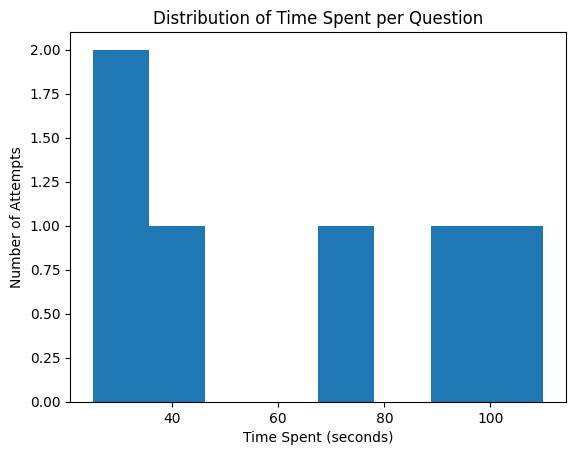

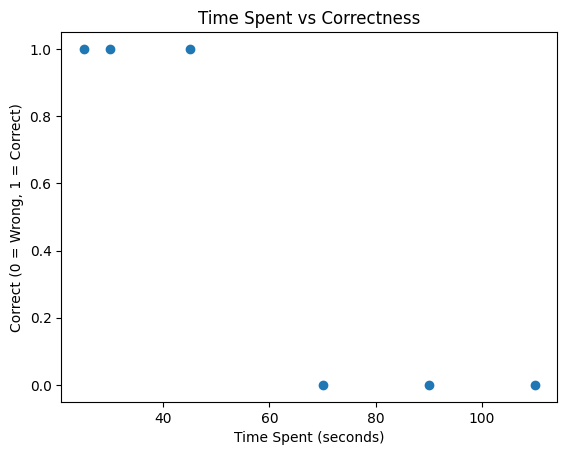


Correlation between Time Spent & Correctness: -0.9086882225022427

Accuracy based on Attempt Type:
Attempt_Type
Fast    1.0
Slow    0.0
Name: Correct, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Data provided in the cell, now loaded directly
data = """Student_ID,Question_ID,Time_Spent_sec,Correct
1,101,30,1
1,102,70,0
2,101,45,1
2,102,90,0
3,101,25,1
3,102,110,0"""

# 1. Load data from string
df = pd.read_csv(io.StringIO(data))


# 2. Basic info
print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# 3. Time spent distribution
plt.hist(df['Time_Spent_sec'], bins=8)
plt.xlabel("Time Spent (seconds)")
plt.ylabel("Number of Attempts")
plt.title("Distribution of Time Spent per Question")
plt.show()

# 4. Scatter plot: Time vs Correctness
plt.scatter(df['Time_Spent_sec'], df['Correct'])
plt.xlabel("Time Spent (seconds)")
plt.ylabel("Correct (0 = Wrong, 1 = Correct)")
plt.title("Time Spent vs Correctness")
plt.show()

# 5. Correlation
correlation = df['Time_Spent_sec'].corr(df['Correct'])
print("\nCorrelation between Time Spent & Correctness:", correlation)

# 6. Pattern detection (Fast vs Slow)
df['Attempt_Type'] = df['Time_Spent_sec'].apply(
    lambda x: "Fast" if x < 60 else "Slow"
)

print("\nAccuracy based on Attempt Type:")
print(df.groupby('Attempt_Type')['Correct'].mean())